In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import matplotlib.pyplot as plt
import plotly.express as px

# Exploratory Data Analysis

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

    age: The person's age in years
    sex: The person's sex (1 = male, 0 = female)
    cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
    trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
    chol: The person's cholesterol measurement in mg/dl
    fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
    restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
    thalach: The person's maximum heart rate achieved
    exang: Exercise induced angina (1 = yes; 0 = no)
    oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
    slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
    ca: The number of major vessels (0-3)
    thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    target: Heart disease (0 = no, 1 = yes)


In [3]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [5]:
all_cols = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
data['sex'][data['sex']==0] == 'Female'
data['sex'][data['sex']==1] == 'Male'
data['chest_pain_type']
continous_var = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
categorical = ['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']
for col in continous_var:
    fig = px.box(data, x = 'target', y = col, color = 'sex')
    fig.show()
for col in categorical:
    fig = px.histogram(data, x = col, color = "target")
    fig.show()

# Hypothesis

According to Data Analysis, the following conclusions are drawn:
* There is direct dependence between the max heart rate acheived and heart probability. 
* If a patient experiences type-2 chest pain, it is likely that he has a heart diesease. 
* Similarly trend can be observed in the exercise induced angina. 
* If the slope is 2, i.e., if the slope is down sloping of a peak exercise, then there is a higher chance that the person has a heart disease. 
* If the number of major vessels are low, then there is a higher chance of getting a heart disease.

If the conclusions drawn are inline with our model, then our model is performing well.

# Model Selection

The following models are trained and tested on the dataset. 

* Random Forest Classifier
* Logistic Regression
* AdaBoost
* Gradient Boost
* XGBoost
* LightGBM

The metric used to select the model is Area under the curve. The model with highest AUC is selected for hyper parameter tuning.

In [6]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import lightgbm
import xgboost as xgb
import multiprocessing 
import pprint
from xgboost import plot_tree
from sklearn.model_selection import RandomizedSearchCV

In [7]:
#y = data['target'].values.reshape(-1,1)
#X = data.drop(['target'], axis = 1)
#print(y.shape)
#print(X.shape)
#model = RandomForestClassifier()
#RSKF = StratifiedKFold(n_splits=5, random_state = 1)
#n_scores = GridSearchCV(model,param_grid = {'max_depth':[2,10]} ,scoring = 'roc_auc', cv = RSKF, error_score = 'raise')
#n_scores.fit(X,y)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



The confusion matrix for the Random Forest Classifier: 
[[27  8]
 [ 5 21]]
The auc for the Random Forest Classifier: 
0.8934065934065935
The confusion matrix for the Logistic Regression: 
[[26  9]
 [ 5 21]]
The auc for the Logistic Regression: 
0.8802197802197802
The confusion matrix for the AdaBoost Classifier: 
[[30  5]
 [ 5 21]]
The auc for the AdaBoost Classifier: 
0.8835164835164835
The confusion matrix for the Gradient Boosting Classifier: 
[[28  7]
 [ 5 21]]
The auc for the Gradient Boosting Classifier: 
0.8736263736263736


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:01:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The confusion matrix for the XG Boost Classifer: 
[[29  6]
 [ 5 21]]
The auc for the XG Boost Classifer: 
0.8692307692307691
The confusion matrix for the LightGBM: 
[[28  7]
 [ 5 21]]
The auc for the LightGBM: 
0.8637362637362637


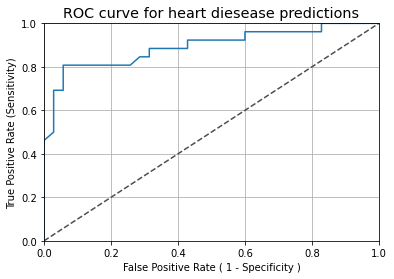

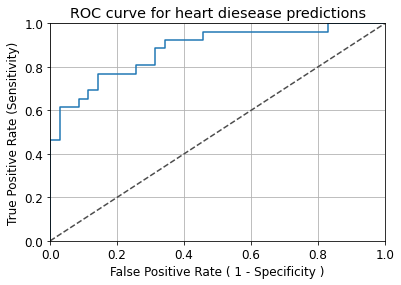

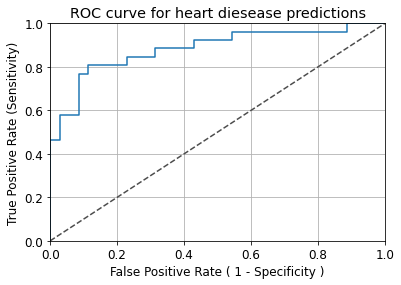

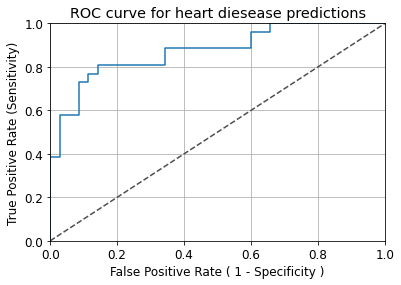

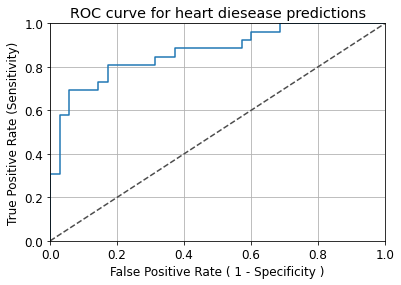

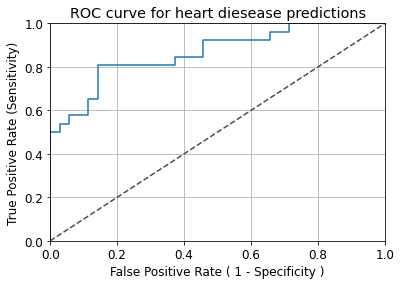

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target',1), data['target'], test_size = 0.2, random_state = 10)
models  = {'Random Forest Classifier': RandomForestClassifier(), 'Logistic Regression' : LogisticRegression(solver = 'liblinear'), 'AdaBoost Classifier' : AdaBoostClassifier(), 'Gradient Boosting Classifier' : GradientBoostingClassifier(), 'XG Boost Classifer' : xgb.XGBClassifier(), 'LightGBM' : LGBMClassifier()}

for model_name,model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    y_pred_quant = model.predict_proba(X_test)[:,1]
    cm = confusion_matrix(y_test, y_predict)
    print(f'The confusion matrix for the {model_name}: ')
    print(cm)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)
    ax.plot([0,1],[0,1], transform=ax.transAxes, ls='--', c = ".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for heart diesease predictions')
    plt.xlabel('False Positive Rate ( 1 - Specificity )')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    print(f'The auc for the {model_name}: ')
    print(auc(fpr,tpr))

Since the Random Forest Classifier has the highest AUC, that model is selected for hyperparameter tuning.

In [9]:
model = models['Random Forest Classifier']
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Random Forest Classifier
Random Forest is an ensemble machine learning technique. Ensemble is a general meta approach to ML that seeks better predictive performance by combining the predictions from multiple models. There are 3 types of ensemble models.

1. Bagging: Bagging involves fitting many decision trees on different samples of the same dataset and averaging the predictions. Ex: Random Forest.
2. Stacking: Stacking involves fitting many different models types on the same dataand using another model to learn how to best combine predictions. Ex: Stacking Classifier
3. Boosting: Boosting involves adding ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions. Ex. Gradient Boost

Each tree in a random forest learns from a random sample of training observations. The samples are drawn with replacement, known as bootstrapping. The main idea behind a Random Forest is that it contains a large number of individual decision trees that acts as an ensemble. Each tree spits out a predictions and the class with the most votes becomes our models prediction. 

In [10]:

#lightgbm.plot_tree(model)
#plt.show()
#lightgbm.plot_importance(model)
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no diesease'
y_train_str[y_train_str == '1'] = 'diesease'
y_train_str = y_train_str.values

The below is the decision tree for the trained Random Forest Model.

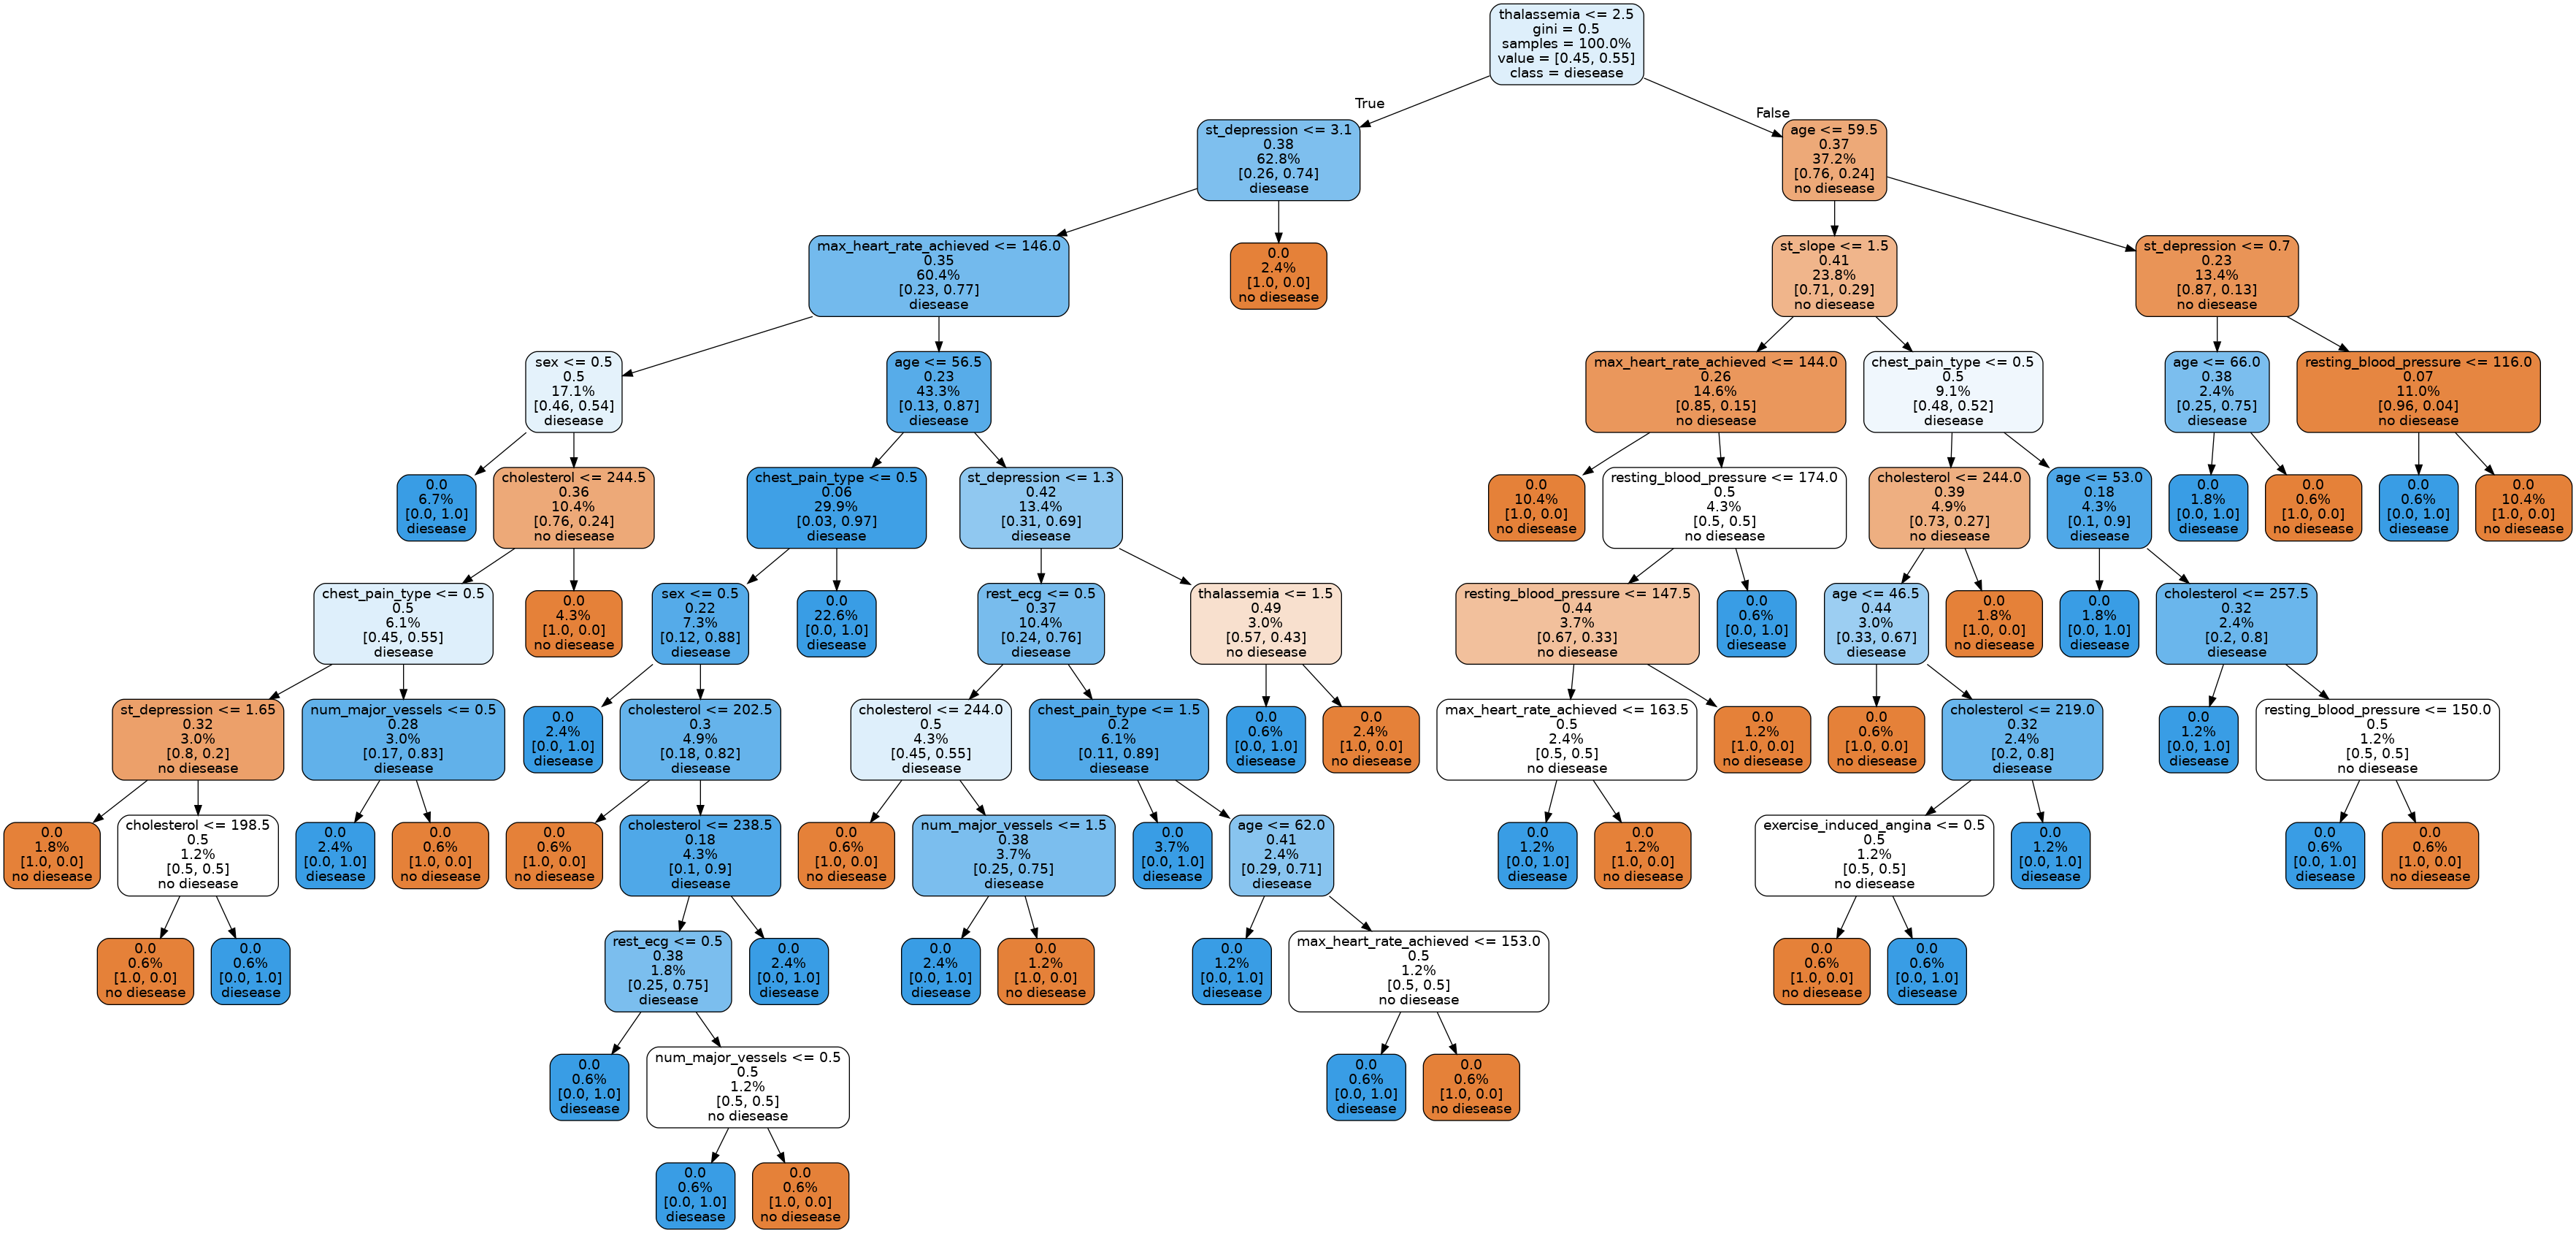

In [11]:
#code from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
export_graphviz(estimator, out_file = 'tree.dot', feature_names = feature_names, class_names = y_train_str, rounded = True, proportion = True, label = 'root', precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi = 600'])

from IPython.display import Image
Image(filename = 'tree.png')

# Hyperparameter Tuning


In [12]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num =10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num =11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap':bootstrap}
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv=5, verbose=2, random_state =42, n_jobs = -1)

rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

best_model = rf_random.best_estimator_
y_predict = best_model.predict(X_test)
y_predict_proba = best_model.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)
auc_val = auc(fpr,tpr)
print(cm)
print(auc_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   55.2s


[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   5.4s
[CV] n_estimators=2000, min_sample

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.7min



[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=   2.8s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=   3.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=20

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.0min



[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   1.9s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_est

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.9min finished


{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
[[27  8]
 [ 5 21]]
0.9120879120879121


# Model insights

In [13]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(best_model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0623 ± 0.0482,chest_pain_type
0.0066 ± 0.0262,st_depression
0.0033 ± 0.0245,sex
0.0033 ± 0.0759,num_major_vessels
0 ± 0.0000,rest_ecg
0 ± 0.0000,fasting_blood_sugar
-0.0033 ± 0.0245,thalassemia
-0.0066 ± 0.0161,cholesterol
-0.0066 ± 0.0161,resting_blood_pressure
-0.0066 ± 0.0445,age


According to Permutation Importance the st_depression and chest_pain_type are the most important features. But according to me, st_slope and max_heart_rate_acheived also are important factors.
Lets continue to verify these results with SHAP values and Partial Dependence Plots.


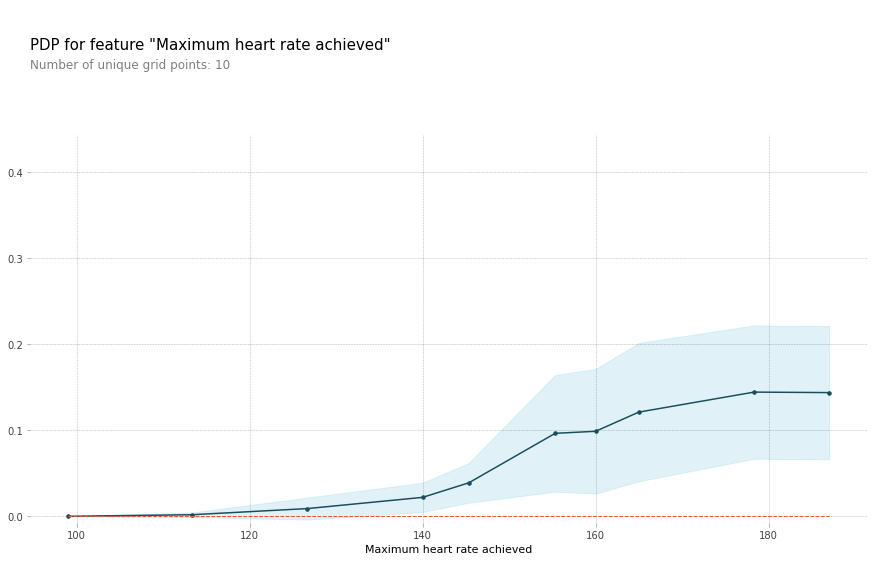


[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   2.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   2.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   0.4s
[CV] n_estimators=2

In [15]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

pdp_chol = pdp.pdp_isolate(best_model, X_test, model_features = X_test.columns.tolist(), feature = 'max_heart_rate_achieved')

pdp.pdp_plot(pdp_chol, 'Maximum heart rate achieved')
plt.show()

So our prediction is right. If the max heart rate increases the chances of getting a stroke increases. Lets check for slope.

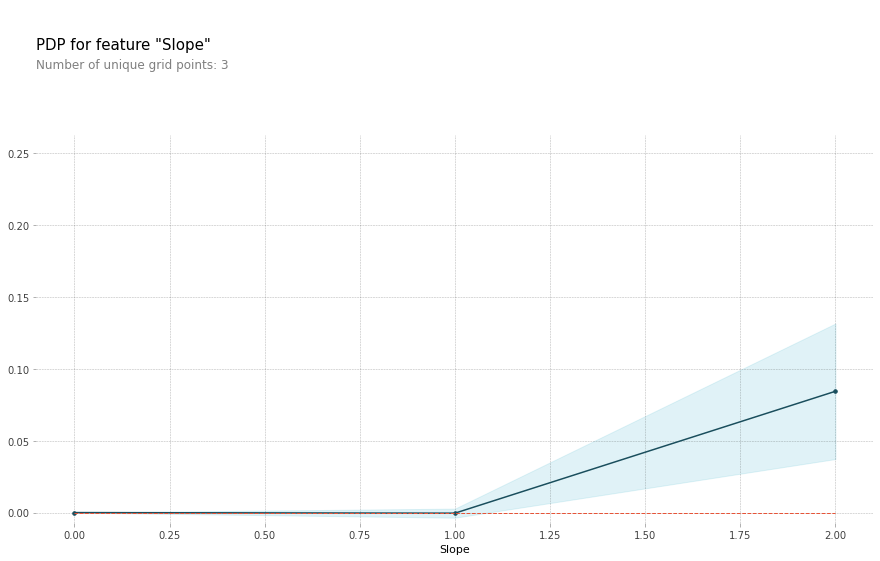

In [16]:
pdp_mhra = pdp.pdp_isolate(best_model, dataset = X_test, model_features = X_test.columns.tolist(), feature = 'st_slope')
pdp.pdp_plot(pdp_mhra, 'Slope')
plt.show()

As expected, if the slope is tending to 2 then the chances of getting heart attack is high.

As it is seen in the PDP the maximum heart rate achieved is one of the important feature. The variability of that parameter was too high. Lets verify this with the SHAP values.


In [17]:
row_to_show = 13
sample_data = X_test.iloc[row_to_show,:].astype(float)
sample_data.columns = data.columns.to_list()
print(sample_data)
sample_data_prediction = sample_data.values.reshape(1,-1)
model.predict_proba(sample_data_prediction)

age                         38.0
sex                          1.0
chest_pain_type              2.0
resting_blood_pressure     138.0
cholesterol                175.0
fasting_blood_sugar          0.0
rest_ecg                     1.0
max_heart_rate_achieved    173.0
exercise_induced_angina      0.0
st_depression                0.0
st_slope                     2.0
num_major_vessels            4.0
thalassemia                  2.0
Name: 164, dtype: float64


array([[0.08, 0.92]])

In [18]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(sample_data)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], sample_data_prediction)

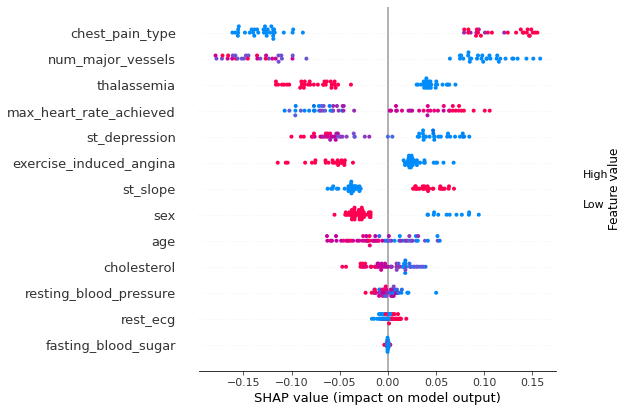

In [19]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

# Conclusions
According to SHAP values chest_pain_type, num_major_vessels and max_heart_rate_achieved are some of the important parameters. So I think the way our model predicts is right. But still when we look at the confusion matrix there are False Positives and False Negatives. That's because the dataset used for training is really small. If a larger dataset is taken then the model predicts much better.